## AI응용수학 / HW1 / 2391019 이정연

In [77]:
import numpy as np
import matplotlib.pyplot as plt

## \# 5.2

In [78]:
def Leebisect(func, xl, xu, Ead):
    if func(xl) * func(xu) > 0:
        return 'initial estimates do not bracket solution'

    n = int(np.ceil(np.log2((xu-xl)/Ead)))
    # 최초 iter를 0번째로 간주하므로 n+1을 해야 원하는 반복횟수 얻을 수 있다.
    n += 1

    xr = 0 ; xrold = 0 ; Ea = 100 ; ea = 100 # 초기화
    for iter in range(n):
        xr = (xl + xu) / 2

        if func(xl) * func(xr) > 0:
            xl = xr
        else:
            xu = xr

        if iter != 0:
            Ea = abs((xr - xrold)) / xr * 100
            ea = (xr - xrold) / xr * 100
        xrold = xr

    root = xr

    return root, Ea, ea, n

Solve # 5.1 by using # 5.2

In [79]:
def f(x):
    m = 95 ; v = 46 ; t = 9 ; g = 9.81
    return np.sqrt(g*m/x) * np.tanh(np.sqrt(g*x/m) * t) - v

(x, Ea, ea, n) = Leebisect(f, 0.2, 0.5, 0.05)
print(f'drag coefficient = {x} kg/m')
print(f'approximate absolute error = {Ea:.4f} %')
print(f'approximate relative error = {ea:.4f} %')
print(f'iterations = {n}')

drag coefficient = 0.40625 kg/m
approximate absolute error = 4.6154 %
approximate relative error = 4.6154 %
iterations = 4


## \# 5.6

In [80]:
def Leeregfal(func, xl, xu, es, maxiter=30):
    if func(xl) * func(xu) > 0:
        return 'initial estimates do not bracket solution'

    n = 0 ; xr = 0 ; xrold = 0 ; Ea = 100 ; ea = 100 # 초기화
    for i in range(maxiter):
        xr = (func(xu)*xl - func(xl)*xu) / (func(xu) - func(xl))

        if func(xl) * func(xr) > 0:
            xl = xr
        else:
            xu = xr

        if i != 0:
            Ea = abs((xr - xrold) / xr) * 100
            ea = (xr - xrold) / xr * 100
        xrold = xr

        n += 1
        if Ea < es: break

    root = xr

    return root, Ea, ea, n

Solve # 5.1 by using # 5.6

In [81]:
def f(x):
    m = 95 ; v = 46 ; t = 9 ; g = 9.81
    return np.sqrt(g*m/x) * np.tanh(np.sqrt(g*x/m) * t) - v

(x, Ea, ea, n) = Leeregfal(f, 0.2, 0.5, 5)
print(f'drag coefficient = {x:.5f} kg/m')
print(f'approximate absolute error = {Ea:.4f} %')
print(f'approximate relative error = {ea:.4f} %')
print(f'iterations = {n}')

drag coefficient = 0.39875 kg/m
approximate absolute error = 1.4046 %
approximate relative error = -1.4046 %
iterations = 3


bisect (#5.2)와 regfal (#5.6) 비교

-> 가위치법이 이분법보다 수렴이 빨랐다.

## \# 6.5

(a) Newton-Raphson method

In [82]:
def newtraph(f, fp, x0, es, maxit=30):
    for i in range(maxit):
        x1 = x0 - f(x0)/fp(x0)
        ea = abs((x1-x0)/x1)*100
        if ea < es: break
        x0 = x1
    return x1, ea, i+1

In [83]:
def f(x): return x**5 -16.05*x**4 +88.75*x**3 -192.0375*x**2 +116.35*x + 31.6875
def fp(x): return 5*x**4 -4*16.05*x**3 +3*88.75*x**2 -2*192.0375*x +116.35

x0 = 0.5825
x, ea, n = newtraph(f, fp, x0, es=0.01)
print(f'root = {x:.1f}')
print(f'approximate absolute error = {ea:.5f} %')
print(f'iterations = {n}')

root = 6.5
approximate absolute error = 0.00027 %
iterations = 22


(b) modified secant method

In [84]:
def modsec(f, x0, d, es, maxit=30):
    for i in range(maxit):
        x1 = x0 - (d*x0*f(x0))/(f(x0+d*x0)-f(x0))
        ea = abs((x1-x0)/x1)*100
        if ea < es: break
        x0 = x1
    return x1, ea, i+1

In [85]:
def f(x): return x**5 -16.05*x**4 +88.75*x**3 -192.0375*x**2 +116.35*x + 31.6875

x0 = 0.5825
x, ea, n = modsec(f, x0, d=0.2, es=0.01)
print(f'root = {x:.1f}')
print(f'approximate absolute error = {ea:.5f} %')
print(f'iterations = {n}')

root = -0.2
approximate absolute error = 0.00796 %
iterations = 8


(c) find all the roots

In [86]:
a = [ 1, -16.05, 88.75, -192.0375, 116.35, 31.6875 ]
r = np.roots(a)

print('roots : ', end='')
for i in range(len(r)):
    print('{:.2f}'.format(r[i]), end='   ')

roots : 6.50   5.00   3.25   1.50   -0.20   

Analyze why (a) and (b) found the root that they did.

-> (pdf 파일에)

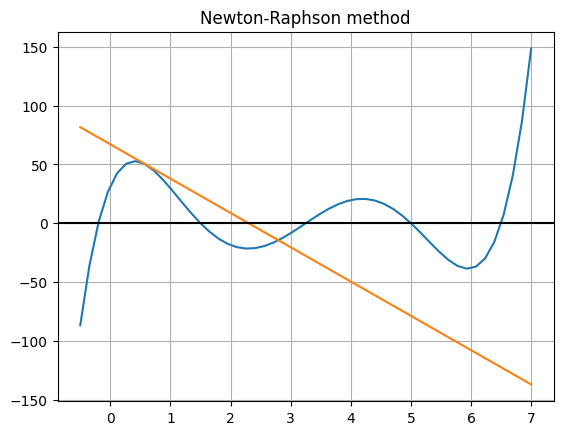

In [87]:
def f(x): return x**5 -16.05*x**4 +88.75*x**3 -192.0375*x**2 +116.35*x + 31.6875
def fp(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def tangentline(f, x): # 접선의 방정식 구하는 함수
    d = fp(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.linspace(-0.5, 7)
y = f(x)
tf = tangentline(f, 0.5825)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.title('Newton-Raphson method')
plt.axhline(y=0, color='black')
plt.grid()
plt.show()

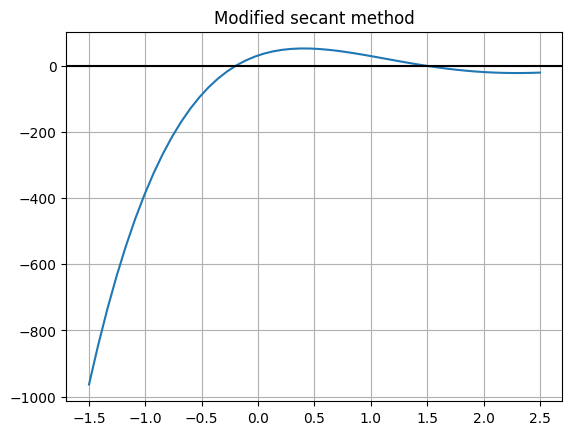

In [88]:
def f(x): return x**5 -16.05*x**4 +88.75*x**3 -192.0375*x**2 +116.35*x + 31.6875

x = np.linspace(-1.5, 2.5)
y = f(x)

plt.plot(x, y)
plt.title('Modified secant method')
plt.axhline(y=0, color='black')
plt.grid()
plt.show()

## \# 6.31

(a) modified secant method

In [89]:
def modsec(func, x0, d, es=1e-7, maxit=30):
    for i in range(maxit):
        x1 = x0 - (d*x0*func(x0))/(func(x0+d*x0)-func(x0))
        ea = abs((x1-x0)/x1)
        if ea < es: break
        x0 = x1
    return x1, ea, i+1

In [90]:
def f(hh):
    hw = 0.8 ; bw = 8 ; qw = 1.3 ; g = 9.81
    cw = 1.125 * np.sqrt( ((1+hh)/hw) / ((2+hh)/hw) )
    return cw * bw * np.sqrt(g) * ((2/3*hh)**(3/2)) - qw

hw = 0.8
h0 = 1.5*hw
hh0 = h0 - hw
hh, ea, n = modsec(f, hh0, d=1e-5)

h = hh + hw

print(f'H = {h:.3f}')
print(f'approximate absolute error = {ea:.3e}')
print(f'iterations = {n}')

H = 1.035
approximate absolute error = 3.820e-12
iterations = 5


(b) Wegstein method

In [91]:
def wegstein(g, x0, x1, es=1e-7, maxit=30):
    for i in range(maxit):
        x2 = (x1*g(x0)-x0*g(x1)) / (x1-x0-g(x1)+g(x0))
        ea = abs((x1-x0)/x1)
        if ea < es: break
        x0 = x1
        x1 = x2
    return x2, ea, i+1

In [92]:
def f(hh):
    hw = 0.8 ; bw = 8 ; qw = 1.3 ; g = 9.81
    cw = 1.125 * np.sqrt( ((1+hh)/hw) / ((2+hh)/hw) )
    return 1.5 * ((qw/(cw*bw*np.sqrt(g)))**(2/3))

hw = 0.8
h0 = 1.01*hw
h1 = 1.4*hw
hh0 = h0 - hw
hh1 = h1 - hw

hh, ea, n = wegstein(f, hh0, hh1)

h = hh + hw

print(f'H = {h:.3f}')
print(f'approximate absolute error = {ea:.3e}')
print(f'iterations = {n}')

H = 1.035
approximate absolute error = 2.086e-11
iterations = 5


(c) `brentq` function from Pyton's SciPy module

In [93]:
from scipy.optimize import brentq

In [94]:
def f(hh):
    hw = 0.8 ; bw = 8 ; qw = 1.3 ; g = 9.81
    cw = 1.125 * np.sqrt( ((1+hh)/hw) / ((2+hh)/hw) )
    return cw * bw * np.sqrt(g) * ((2/3*hh)**(3/2)) - qw

hw = 0.8
hh0 = (1.01-1)*hw
hh1 = (1.4-1)*hw

hh = brentq(f, hh0, hh1, maxiter=30, full_output=True)

print(hh)

h = hh[0] + hw

print(f'H_h = {hh[0]:.3f}')
print(f' H  = {h:.3f}')

(0.23507252465320705,       converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.23507252465320705)
H_h = 0.235
 H  = 1.035


Would you expect this problem to be convergent for fixed-point iteration? Explain.

-> (pdf 파일에)

## \# 7.9

(a) Golden-section search

In [95]:
def goldmin(f, xl, xu, es, maxit=30):
    phi = (1+np.sqrt(5)) / 2
    d = (phi-1) * (xu-xl)
    x1 = xl + d ; f1 = f(x1)
    x2 = xu - d ; f2 = f(x2)

    ea = 100 # 초기화
    for i in range(maxit):
        xint = xu - xl
        if f1 < f2:
            xopt = x1
            xl = x2
            x2 = x1
            f2 = f1
            x1 = xl + (phi-1)*(xu-xl)
            f1 = f(x1)
        else:
            xopt = x2
            xu = x1
            x1 = x2
            f1 = f2
            x2 = xu - (phi-1)*(xu-xl)
            f2 = f(x2)

        if xopt != 0:
            ea = (2-phi)*abs(xint/xopt) * 100
            if ea <= es: break

    return xopt, f(xopt), ea, i+1

In [96]:
def f(x) : return x**4 + 2*x**3 + 8*x**2 + 5*x

xopt, f_xopt, ea, n = goldmin(f, -2, 1, es=1)
print(f'Value at minimum function value = {xopt:.4f} ')
print(f'Minimum function value = {f_xopt:.4f} ')
print(f'Relative error = {ea:.4f} %')
print(f'Iterations = {n}')

Value at minimum function value = -0.3468 
Minimum function value = -0.8408 
Relative error = 0.6342 %
Iterations = 14


(b) Parabolic interpolation

In [97]:
def interpolmin(f, x1, x2, x3, maxit):
    x2old = x2 # 초기화
    for i in range(maxit):
        f1 = f(x1) ; f2 = f(x2) ; f3 = f(x3)
        x4 = x2 - 0.5 * (((x2-x1)**2 * (f2-f3) - (x2-x3)**2 * (f2 - f1)) / ((x2-x1) * (f2-f3) - (x2-x3) * (f2-f1)))
        f4 = f(x4)

        if x2 < x4 < x3:
            if f4 < f2:
                x1 = x2
                x2 = x4
            else:
                x3 = x4
        else:
            if f4 < f2:
                x3 = x2
                x2 = x4
            else:
                x1 = x4

        ea = abs((x2-x2old)/x2) * 100
        x2old = x2

    return x2, f(x2), ea, i+1

In [98]:
def f(x) : return x**4 + 2*x**3 + 8*x**2 + 5*x

xopt, f_xopt, ea, n = goldmin(f, -2, -1, 1, maxit=5)
print(f'Value at minimum function value = {xopt:.4f} ')
print(f'Minimum function value = {f_xopt:.4f} ')
print(f'Relative error = {ea:.4f} %')
print(f'Iterations = {n}')

Value at minimum function value = -1.0557 
Minimum function value = 2.5268 
Relative error = 5.2786 %
Iterations = 5


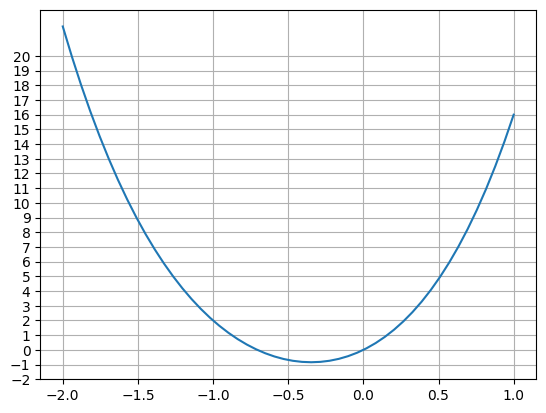

In [99]:
x = np.linspace(-2, 1)
plt.plot(x, f(x))
plt.yticks(np.arange(-2,21))
plt.grid()
plt.show()

## \# 7.27

Determine the location of the minimum

(a) graphically, using a contour plot

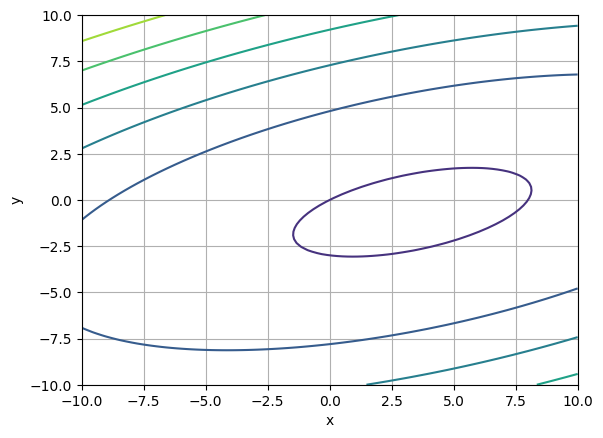

In [100]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X,Y = np.meshgrid(x,y)
Z = -8*X + X**2 + 12*Y + 4*Y**2 -2*X*Y

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.show()

(b) using the minimize function from the Scipy `optimize` module.

In [101]:
from scipy.optimize import minimize

In [102]:
def f(X):
    x = X[0]
    y = X[1]
    return -8*x + x**2 + 12*y + 4*y**2 -2*x*y

x0 = [0,0]
result = minimize(f, x0, options={'disp':True})
xmin = result.x
print(xmin)

Optimization terminated successfully.
         Current function value: -17.333333
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7
[ 3.33333292 -0.66666681]
